# PySINDy Exploration & Applications

## COLSA Corporation 

### Raj Garkhedkar, DACS Lab Summer 2021 Intern

## Korteweg - De Vries Equation
<br>
PDE-FIND and PySINDy are capable of accepting derivatives and showing their evolution through simulations. This sort of 'dynamic discovery' of underlying equations is a result of measurement data to find the equation.
<br>
<br>
<br>
This equation is a mathematical model of waves on shallow water surfaces, plasma physics, anharmonic lattices, and elastic rods. It is particularly notable as the prototypical example of an exactly solvable model, that is, a non-linear partial differential equation whose solutions can be exactly and precisely specified.

$$u_t(x,t) + 6u(x,t)u_x(x,t) + u_{xxx}(x,t) = 0$$ 
Which rephrased in terms of this analysis is:
$$u_t + 6uu_x + u_{xxx} = 0$$
and
$$u_t + cu_x = 0$$
Where the advection equation becomes apparent for a single travelling wave, but looking at the two wavefronts above there is a nonlinearity revealed since they travel at different rates thus evolving differently.

Another form is:
$$u_t + uu_x + \delta^2 u_{xxx} = 0$$
The initial conditions can be set as: $u(x,0) = cos(\pi x)$ and $\delta = 0.022$

##### Derivation For Dynamical Decaying System:
A simple wave solution is a function of the form $u(x,t) = f(x-ct)$ which is a solution to the PDE $u_t + cu_x = 0$ where $c$ is the speed of the wave. For a wave represented by $f(x-ct) and f(x+ct)$, there is a trial solution: 
$$u(x,t) = z(x-\beta t) = z(\xi)$$
After denoting $\beta$ as $c$ and the function $f$ by $z$:
$$-\beta\frac{dz}{d\xi}+6z\frac{dz}{d\xi}+\frac{d^3z}{d\xi^3} = 0$$
Which is an ODE, leading to a solution done by direct integration:
$$-\beta z + 3z^2 + \frac{d^2z}{d\xi^2}=c_1$$ 
where $c_1$ is a constant of integration. The next step is to obtain a first order equation for $z$, done through multiplication with $\frac{dz}{d\xi}$:
$$-\beta z \frac{dz}{d\xi}+3z^2\frac{dz}{d\xi}+\frac{d^2z}{d\xi^2}\frac{dz}{d\xi}=c_1\frac{dz}{d\xi}$$
$$\Longrightarrow -\beta zdz + 3z^2dz + \frac{d^2z}{d\xi^2}dz = c_1dz$$
Integrate both sides with $c_2$ as constant of integration leads to:
$$-\frac{\beta}{2}z^2 + z^3 + \frac{1}{2}(\frac{dz}{d\xi})^2 = c_1z + c_2$$
Which requires that $x\to \pm\infty$ we get $z\to0, \frac{dz}{d\xi} \to 0, \frac{d^2z}{d\xi^2} \to0$ and it follows that $c_1 = c_2 = 0$. 
<br>
<br>
The solution then is:
<br> 
$$u(x,t) = \frac{\beta}{2}sech^2[\frac{\sqrt{\beta}}{2}x-\beta t)]$$
Which is a single soliton traveling to the right at a constant speed with no decay or loss of energy. It represents a solitary wave moving to the right, for which $\beta$ must be positive. 
_HOWEVER_, that is a solution to the PDE for a solitary wave moving to the right, that is not a 'dynamical' system in the PySINDy sense, so therefore, I'll have to find a way to incorporate PySINDy for the original PDE so it 'learns' the right hand side of the equation. 

This should be interesting to implement and see if I can generate data for this and create a PySINDy model to mathematically represent an arbitrary wavefront in shallow water through data driven discovery of the specific equation governing the case at hand.

## KdVB (Korteweg de Vries - Burgers) Equation - Dissipative Wave
The KdVB equation is used for many physical problems (like nonlinear shallow waves in water, wave motion in plasma, etc...) which is:
$$ \frac{\partial u}{\partial t}+ u\frac{\partial u}{\partial x} - \underbrace{a \frac{\partial^2 u}{\partial x^2}}_{Dissipative\space Term} + \beta \frac{\partial^3 u}{\partial x^3} = 0 $$
<br> 
A solution for the general case where $(a>0, \beta > 0)$ requires an asymptotic expansion, presented in [this paper](https://arxiv.org/pdf/1403.3636.pdf) and more derivations in [this paper](https://www.researchgate.net/publication/225758505_Burgers-Korteweg_de_Vries_equation_and_its_traveling_solitary_waves) 


## [PDE-FIND](https://advances.sciencemag.org/content/3/4/e1602614.full) Central Information:
Consider a parameterized nonlinear PDE of the form $u_t = N(u, u_x, u_{xx}, ... , x, \mu)$ where the subscripts are partial differentials, temporal or spatial, dictated by a nonlinear function and it's derivatives & parameters in $\mu$. The goal is to create a time series measurement of the system at fixed intervals, while ensuring that the function retains the fewest possible terms, thus making it sparse relative to the large space it spans.

After discretized, the right hand expressed as a function of $U$ which is a discretized form of $u(x,t)$ and its derivatives. The central representation of this paper is the following:
$$U_t = \bf{\Theta(U_1Q)}\xi$$ 

Explains how the PDE evolves over the discretized domains. The matrix $\bf{\Theta(U,Q)}$ has a column matrix $\bf{Q}$ which contains input terms for the right hand side of the original PDE. Each nonzero entry in $\xi$ is a term in the PDE, and for canonical PDE's, $\xi$ is sparse (few active terms).

For the KdV Equation and soliton solution $u(x,t) = \frac{\beta}{2}sech^2[\frac{\sqrt{\beta}}{2}x-\beta t)]$, which propagates at a speed equal to its amplitude, a one way wave equation $u_t + cu_x = 0$ would be equivalent to the one above, hence, it's challenging to PDE-FIND for identifying a sparse representation. A time series dataset is constructed for more than a single initial amplitude, enabling the unique determination of the governing PDE.


## Some Terms

#### L0 Penalty:
Norms measure 'size' of vectors in some space. The L0 norm is the number of nonzero elements in a vector. L0 norm tries to find the sparsest solution to an underdetermined system of equations, essentially trying to minimize the nonzero elements. An example of the L0 penality is when having two vectors (username and password). If the L0 norm of the vectors is equal to 0, then the login is successful. Otherwise, if the L0 norm is 1, it means that either the username or password is incorrect, but not both. And lastly, if the L0 norm is 2, it means that both username and password are incorrect.

#### STRidge
Sequential Thresholding Ridge Regression, as defined in the [Data Driven Discovery of Partial Differential Equations](https://advances.sciencemag.org/content/3/4/e1602614.full) paper, states that the algorithm requires the sparsest vector $\xi$ that satisfies $$U_t = \Theta(U_1Q)\xi$$ 

---
##### Links
[Wikipedia](https://en.wikipedia.org/wiki/Korteweg%E2%80%93De_Vries_equation)

[U-Chicago Algos](https://newtraell.cs.uchicago.edu/files/ms_paper/hmmorgan.pdf)

[Caltech Paper](http://www.math.caltech.edu/~2015-16/3term/ma191c-sec7/notes/Lecture1.pdf)

[Columbia Uni Project](https://github.com/TiagoJCor/Numerical-Methods-KDV/blob/master/numerical_KDV.ipynb0)

[MIT Slides pdf](https://web.mit.edu/2.29/www/img/projects/spring_2018/gjstein.pdf)

[BYU Paper](http://www.acme.byu.edu/wp-content/uploads/2016/01/Solitons.pdf)

[SciPy Cookbook](https://scipy-cookbook.readthedocs.io/items/KdV.html)

[GitHub Sol](https://github.com/jundongq/Korteweg-deVries-KdV-Equation-Solution/blob/master/solve_KdV.py)

[German paper](https://www.uni-muenster.de/imperia/md/content/physik_tp/lectures/ss2017/numerische_Methoden_fuer_komplexe_Systeme_II/kdv.pdf)

[Scikit FiniteDiff Study Case](https://scikit-fdiff.readthedocs.io/en/latest/auto_examples/plot_1D_kdv.html)

[African Institute For Mathematical Sciences Approach](https://www.researchgate.net/publication/309394697_The_Korteweg_de_Vries_and_Takahashi_Satsuma_Approaches_to_Solitons)

[GitHub Sol 2](https://github.com/ianabc/Solitons/blob/master/Solitons.ipynb)

[U-Toronto Lab](https://www.physics.utoronto.ca/~phy326/sol/sol.pdf)

[Another GitHub Imp](https://gist.github.com/fjkz/4e6281eefb777b3d65017fbf5eee3d10)

[KEY PAPER Data Driven Discovery of PDE's w/ PDE-FIND](https://advances.sciencemag.org/content/3/4/e1602614)

[PDE-FIND GitHub Useful Funcs](https://github.com/snagcliffs/PDE-FIND/blob/master/PDE_FIND.py)

[Brunton PDE-FIND 2 Soliton](https://github.com/snagcliffs/PDE-FIND/blob/master/Examples/TwoSolitonKDV.ipynb)

[Brunton PDE-FIND KdV/Advection](https://github.com/snagcliffs/PDE-FIND/blob/master/Examples/KdVandAdvection.ipynb)

[Kawahara Structure](https://github.com/xli2522/kdv-kawahara/blob/main/Kawahara/fourierKawahara_num_analysis.py)

[Numerical Method Solving Implementation](https://github.com/TiagoJCor/Numerical-Methods-KDV/blob/master/numerical_KDV.ipynb)

[Soliton Interaction repo](https://github.com/jundongq/Korteweg-deVries-KdV-Equation-Solution)

[Dissipative Solution](https://gitlab.physics.utoronto.ca/advanced-lab/experiments/solitons/-/blob/master/python/kdv_diss_SOL.py) and [Dissipative Functions](https://gitlab.physics.utoronto.ca/advanced-lab/experiments/solitons/-/blob/master/python/kdv_functions.py)

[PINN KdV Paper](https://www.hindawi.com/journals/amp/2021/5569645/)

[PINN GitHub Repo](https://github.com/maziarraissi/PINNs)

[KdV PINN](https://github.com/izukune/PhysicsInformedNN/blob/main/kdv/continuous.py)

[Main KdV PINN](https://github.com/maziarraissi/PINNs/blob/master/main/discrete_time_identification%20(KdV)/KdV.py)

[Regressions & Penalization Article](https://faculty.washington.edu/yenchic/18W_425/Lec11_Reg03.pdf)

[PINNs Of PDE's](https://maziarraissi.github.io/PINNs/)

[KdV Types](http://www.math.caltech.edu/~2015-16/3term/ma191c-sec7/notes/Lecture1.pdf)

[KdVB Equation Paper](https://arxiv.org/pdf/1403.3636.pdf)

In [114]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import IPython.display as IPdisplay
import seaborn as sns
import scipy.sparse as sparse
import os
import sys
import glob
import time
import warnings
import pandas as pd
import pylab as pl
import math
import itertools
import operator
import scipy.misc
import IPython.display as ipdisplay
import matplotlib.animation as animation
import scipy.io as sio
import PDE_FIND as pdefind
from numpy import linalg as LA
from numpy.fft import rfft,irfft,rfftfreq
from time import process_time
from scipy.integrate import odeint, solve_ivp
from scipy.fftpack import diff as diffy
from scipy.sparse import dia_matrix, csc_matrix
from scipy.interpolate import griddata
from scipy.optimize import curve_fit
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
from PIL import Image as pil
from PIL import ImageDraw as draw
from subprocess import check_output
from functools import partial
from IPython.core.interactiveshell import InteractiveShell
from IPython import display
from IPython.core.display import Image
#from PDE_FIND import *

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 2000
pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)
family = 'Times New Roman'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [90]:
def visualize(soliton_sol): 
    x = np.linspace(-100, 100, 1000)
    t = np.linspace(0, 100, 1000) 
    X, T = np.meshgrid(x, t) 
    vf = np.vectorize(soliton_sol)
    z = vf(X, T) 
    fig = plt.figure(figsize = (16, 10))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(X, T, -z, cmap = 'viridis')
    plt.xlabel('x') 
    plt.ylabel('t')

In [91]:
'''
Below is from SciPy docs - their discretized solutions 
and solutions on a periodic domain.
'''

# The exact solution to the KdV
def kdv_exact(x, c):
    """Profile of the exact solution to the KdV for a single soliton on the real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

# The KdV model using FFT
def kdv(u, t, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = diffy(u, period=L)
    uxxx = diffy (u, period=L, order=3)

    # Compute du/dt.    
    dudt = -6*u*ux - uxxx

    return dudt

def kdv_solution(u0, t, L):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

def sech_squared(x):
    return (1.0/np.cosh(x))**2
    
def diss_kdv_solution(u0, t, L, mu):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""

    return odeint(diss_kdv, u0, t, args=(L,mu,), mxstep=5000)

def diss_waveshape(x,*p):        # this is the same as the waveshape function, but with no background term
    return p[0]*sech_squared( (x-p[1])/p[2] )

def diss_kdv(u, t, L, mu):
    """Differential equations for the dissipative KdV equation, discretized in x.
       including a disspative mu * uxx term  """

    # Compute the x derivatives using the pseudo-spectral method.
    ux   = diffy(u, period=L)
    uxxx = diffy(u, period=L, order=3)
    uxx  = diffy(u, period=L, order=2)  # new dissipative term

    # Compute du/dt.    
    dudt = -6*u*ux - uxxx + mu*uxx

    return dudt

Values Matrix Shape:  (1000,)

Time Matrix Shape:  (1000,)

Soliton Matrix Shape:  (1000, 2) *Ensure it is (1000,2)*

-- -- -- -- --


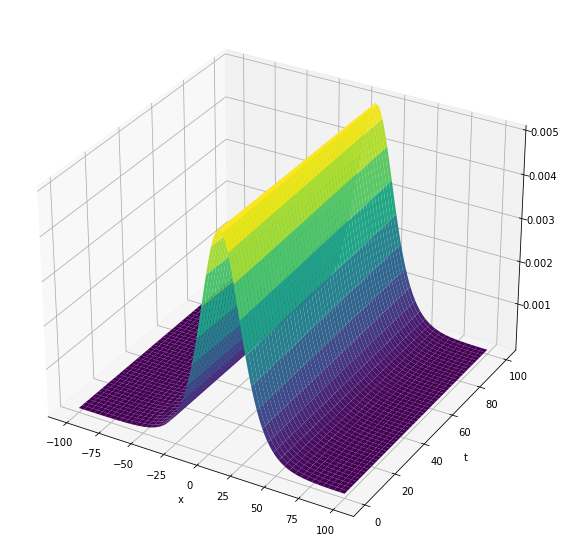

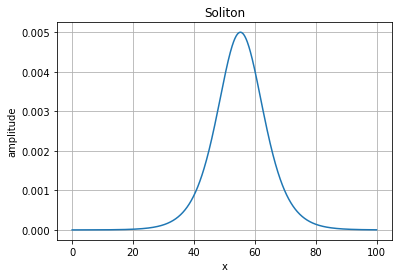

In [92]:
def soliton1(x, t): 
    c = 0.01
    z = 10
    return (-1/2 * c) * (1/np.cosh((np.sqrt(c)/2)*(x - c*t - z)))**2

x = np.linspace(-100, 100, 1000)
t = np.linspace(0, 100, 1000)
temp = soliton1(x,t)
time = np.linspace(0,100,1000)
print('Values Matrix Shape: ', temp.shape)
print('')
print('Time Matrix Shape: ', time.shape)
print('')
mat = np.column_stack((time,temp))
print('Soliton Matrix Shape: ', mat.shape, '*Ensure it is (1000,2)*')
print('')
visualize(soliton1)
print('-- -- -- -- --')
fig, ax = plt.subplots()
ax.plot(time, -temp)

ax.set(xlabel='x', ylabel='amplitude',
       title='Soliton')
ax.grid()
plt.show()

## PDE-FIND for KdV Equation - Their Implementation

As mentioned in DDSE and work from University of Washington. Their notebook loads an existing MATLAB file, which I can't find online, so I'll have to create data resembling theirs. According to them, the two soliton solution provided does not interact but works well if they do interact as well.

In [93]:
# Soliton solution to KdV/advection equations
def pdefind_soliton(x,t,c,a):
    return c/2*np.cosh(np.sqrt(c)/2*(x-c*t-a))**-2


c1 = 5.0
c2 = 1.0
n = 256
m = 50
x = np.linspace(-10, 12, n)
dt = 0.025
dx = x[1]-x[0]
t = np.linspace(dt,m*dt,m)

U1 = np.zeros((n,m))
U2 = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        U1[i,j] = pdefind_soliton(x[i],t[j],c1,-3)
        U2[i,j] = pdefind_soliton(x[i],t[j],c2,-1)

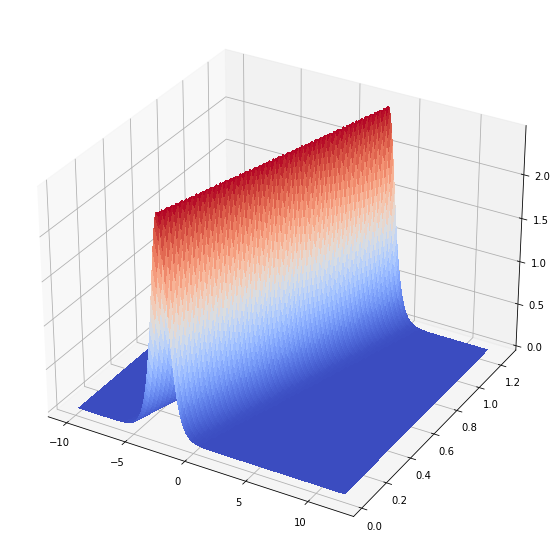

In [94]:
X, T = np.meshgrid(x, t)
plt.figure(figsize=(13,10))
ax = plt.gca(projection='3d')
surf = ax.plot_surface(X, T, U1.T, rstride=1, cstride=1, cmap='coolwarm',
    linewidth=0, antialiased=False)
plt.show()

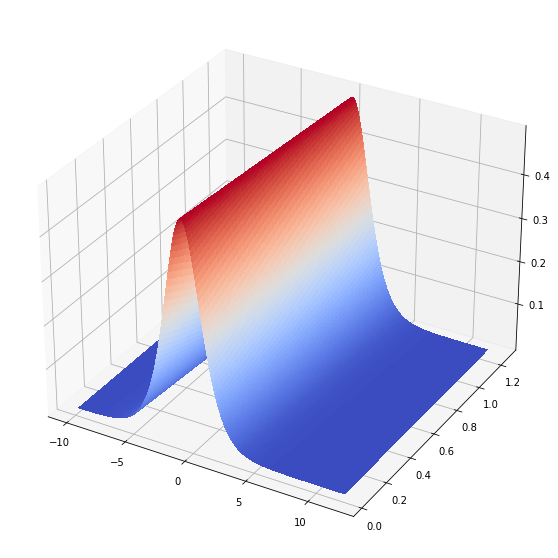

In [95]:

X, T = np.meshgrid(x, t)
plt.figure(figsize=(13,10))
ax = plt.gca(projection='3d')
surf = ax.plot_surface(X, T, U2.T, rstride=1, cstride=1, cmap='coolwarm',
    linewidth=0, antialiased=False)
plt.show()

Above graphs show two different solutions to the equation with varying amplitudes and speeds of travel

### Individual Solution Analysis
Looking first at the wave traveling at speed = 5 and then speed = 1

There is a really confusing part of their implementation where below it's noted `STRidge with L0 penalty` but in checking their function in the `PDE-FIND` library, L2 

In [96]:
Ut1, R1, rhs_des1 = pdefind.build_linear_system(U1, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
lam = 10**-5
d_tol = 5

w = pdefind.TrainSTRidge(R1,Ut1,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
pdefind.print_pde(w, rhs_des1)

PDE derived using STRidge with L0 penalty
u_t = (-4.981273 +0.000000i)u_{x}
   


In [97]:
Ut2, R2, _ = pdefind.build_linear_system(U2, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')

w = pdefind.TrainSTRidge(R2,Ut2,lam,d_tol)
print ("PDE derived using STRidge with L0 penalty")
pdefind.print_pde(w, rhs_des1)

PDE derived using STRidge with L0 penalty
u_t = (-1.000820 +0.000000i)u_{x}
   


### Both solutions 
The linear systems are stacked so that the PDE accurately reflects the dynamics of each wave and leads to an accurate KdV equation

In [98]:
R = np.vstack([R1, R2])
Ut = np.vstack([Ut1,Ut2])

w = pdefind.TrainSTRidge(R,Ut,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
pdefind.print_pde(w, rhs_des1)

PDE derived using STRidge with L0 penalty
u_t = (-6.073982 +0.000000i)uu_{x}
    + (-1.039532 +0.000000i)u_{xxx}
   


## Two Soliton Solution

This is for the equation $ u_t + 6uu_x + u_{xxx} = 0 $ with two solitons that do not interact

In [99]:
dataset = sio.loadmat('/Users/rajgark/Documents/GitHub/COLSA-PySINDy/KdV Data/kdv_pdefind_dataset.mat')
U = dataset['usol'].astype(float)
x = dataset['x'][0].astype(float)
t = dataset['t'][:,0].astype(float)
n, m = U.shape
print('n shape:', n, '  m shape:', m)
dt = t[1]-t[0] 
dx = x[1]-x[0] 
print(' ')
print('dt:', dt, '   dx:', dx)

n shape: 512   m shape: 201
 
dt: 0.1    dx: 0.1171875


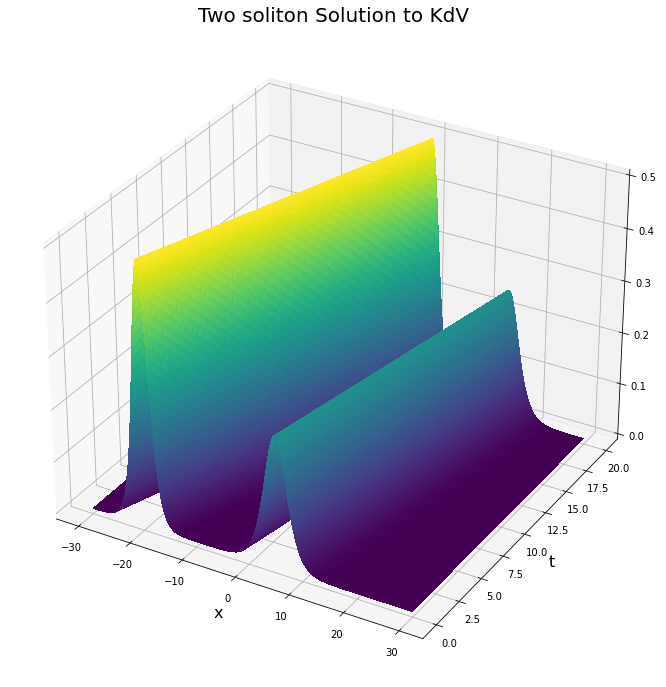

In [100]:
X, T = np.meshgrid(x, t)
plt.figure(figsize=(12,12))
ax = plt.gca(projection='3d')
surf = ax.plot_surface(X, T, U.T, rstride=1, cstride=1, cmap='viridis',
    linewidth=0, antialiased=False)
plt.title('Two soliton Solution to KdV', fontsize = 20)
plt.xlabel('x', fontsize = 16)
plt.ylabel('t', fontsize = 16)
plt.show()

### Construct $\Theta(U)$ and computing $U_t$

This uses their PDE-FIND function `build_linear_system` where $\bf{D}$, the highest derivative in $\Theta$ is explicitly stated, $\bf{P}$ which is the highest degree polynomial of $u$ which is in $\Theta$ (not including multiplication by a derivative. Time_diff and space_diff taken via finite differences) and returns the candidate functions for the PDE, each being a column of $\Theta(U)$

In [101]:
Ut, R, rhs_des = pdefind.build_linear_system(U, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
['1']+rhs_des[1:]

['1',
 'u',
 'u^2',
 'u_{x}',
 'uu_{x}',
 'u^2u_{x}',
 'u_{xx}',
 'uu_{xx}',
 'u^2u_{xx}',
 'u_{xxx}',
 'uu_{xxx}',
 'u^2u_{xxx}']

### Solving for $\xi$
Their function `TrainSTRidge` does an 80-20 train-validation split which finds tolerances in the STRidge algorithm to ultimately find the best performing fit on the validation set, including an $\ell^0$ penalty for $\xi$ in the loss function

In [102]:
# Solve with STRidge using 2-norm normalization
w = pdefind.TrainSTRidge(R,Ut,10**-5,5)
print ("PDE derived using STRidge")
pdefind.print_pde(w, rhs_des)

PDE derived using STRidge
u_t = (-5.956504 +0.000000i)uu_{x}
    + (-0.988106 +0.000000i)u_{xxx}
   


In [103]:
err = abs(np.array([(6 - 5.956504)*100/6, (1 - 0.988106)*100]))
print(np.mean(err))
print(np.std(err))

0.9571666666666663
0.23223333333332968


### Dynamics w/ Added Noise 
The same dynamics as above except with noise added. Finite Diff is bad with noise so polynomial interpolation, the degrees are specified to fit the polynomials with differentiating x or t. The result is sensitive to this.

In [104]:
np.random.seed(0)
Un = U + 0.01*np.std(U)*np.random.randn(n,m)

In [105]:
Utn, Rn, rhs_des = pdefind.build_linear_system(Un, dt, dx, D=3, P=2, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 10, deg_x = 5)

In [106]:
# Solve with STRidge using 2-norm normalization
wn = pdefind.TrainSTRidge(Rn,Utn,10**-5,5)
print("PDE derived using STRidge")
pdefind.print_pde(wn, rhs_des)

PDE derived using STRidge
u_t = (-6.152522 +0.000000i)uu_{x}
    + (-1.124033 +0.000000i)u_{xxx}
   


In [107]:
err = abs(np.array([(6 - 6.152522)*100/6, (1 - 1.124033)*100]))
print(np.mean(err))
print(np.std(err))

7.4726666666666715
4.930633333333334


In [108]:
amp = 0.9
L = 50.0
N = 256
dx = L / (N - 1.0)
x = np.linspace(0, (1-1.0/N)*L, N)

u0 = kdv_exact(x-0.1*L, amp)  # initial condition with a soliton near the left end

# Set the time sample grid.
T = 50      # total time to integrate for
num_t = 501 # number of timesteps
t = np.linspace(0, T, num_t)

mu_range = np.linspace(0.0, 0.05, 6)

In [115]:
for mu in mu_range:

    print('Computing the solution for amp = '+str(amp)+' mu = ' + str(mu))
    sol = diss_kdv_solution(u0, t, L, mu)

    print('Generating a space time plot')

    f = plt.figure()
    #[::-1, :] is a python trick for reversing the first index so t=0 is at the bottom of the image
    plt.imshow(sol[::-1, :], cmap='jet', extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Dissipative KdV for amp = '+str(amp)+' mu = '+str(mu))
    #plt.savefig('./diss_kdv_results/diss_kdv_spacetime_amp_'+str(amp)+'_mu_'+str(mu)+'.png')
    plt.close(f)

    # arrays to acumulate data for fitting 
    A_fit  = np.array([])
    w_fit  = np.array([])

    t_fit = t[::10]    # fit every 10th value of t
    s_fit = sol[::10,:]

    for i in range(len(t_fit)):
        u_fit = s_fit[i,:]

        A_est = max(u_fit)             # p[0]  amplitude = peak height
        x0_est = x[np.argmax(u_fit)]      # p[1]  peak position = position of maximum
        w_est = np.sqrt(2/A_est)          # p[2]  width of peak 

        p, cov = curve_fit(diss_waveshape, x, s_fit[i,:], p0=(A_est,x0_est,w_est))

        A_fit = np.append(A_fit, p[0])
        w_fit = np.append(w_fit, p[2])

        # uncomment the following to see what the fits look like in x

        check_fit = diss_waveshape(x,*p)

        f = plt.figure()
        plt.plot(x,u_fit,'.',x,check_fit)
        plt.show()


    f = plt.figure()
    plt.plot(t_fit, A_fit, 'b.')
    plt.xlabel('dimensionless time')
    plt.ylabel('dimensionless amplitude')
    plt.title('Amplitude decay for dissipative KdV, amp = '+str(amp)+' mu= '+str(mu))
    plt.show()

    f = plt.figure()
    plt.plot(t_fit, w_fit, 'r.')
    plt.xlabel('dimensionless time')
    plt.ylabel('dimensionless width')
    plt.title('Width growth for dissipative KdV, amp = '+str(amp)+' mu= '+str(mu))
    plt.show()

    f = plt.figure()
    plt.plot(w_fit, np.sqrt(2/A_fit), '.')
    plt.xlabel('dimensionless width')
    plt.ylabel('sqrt(2/A')
    plt.title('w vis. sqrt(2/A) for dissipative KdV, amp = '+str(amp)+' mu= '+str(mu))
    plt.show()

## Non-Linear Motion: A Broader Application for Model Predictive Control



-- -- -- -- -- --
###### Links
IMPORTANT:

[VIDEO Finite Horizon, energy optimal trajectories in unsteady flows](https://www.youtube.com/watch?v=IBLR1TcFSCI), and [PAPER for model predictive control](https://arxiv.org/pdf/2103.10556.pdf) and [CODE repo for gyre motion](https://github.com/karkris41295/single-agent-MPC-FTLE)

[Lagrangian coherent structures](https://en.wikipedia.org/wiki/Lagrangian_coherent_structure)

Supplemental:

[U.S. Army Research Office Defense Technical Information Center: Nonlinear waves, dynamical systems, and other applied math](https://apps.dtic.mil/sti/citations/ADA244376)

[Nonlinear analysis of periodic waves in a neural field model](https://aip.scitation.org/doi/10.1063/5.0012010)

[Universal theory of brain waves](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7951957/?tool=pmcentrez&report=abstract)

[Laplace in 2D](https://github.com/sandstede-lab-teaching/Solving_PDEs/blob/main/Laplace_Equation_2D.ipynb)

[PINN's for PDE Reconstruction](https://github.com/SerafimNSU/easyAI)